In [2193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
import numpy as np

In [2194]:
df = pd.read_csv('insurance.csv')

In [2195]:
print(f"Shape of the dataset: {df.shape}")


Shape of the dataset: (1338, 7)


In [2196]:
pd.DataFrame({
    'data type':df.dtypes,
    'unique Values': df.nunique(),
    'Missing values': df.isnull().sum()
})

,data type,unique Values,Missing values
age,int64,47,0
sex,object,2,0
bmi,float64,548,0
children,int64,6,0
smoker,object,2,0
region,object,4,0
charges,float64,1337,0


No missing values detected in any column.
The dataset contains a mix of numerical (age, bmi, children, charges) and categorical (sex, smoker, region) features.

In [2197]:
df[df.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [2198]:
df.drop_duplicates(inplace= True)

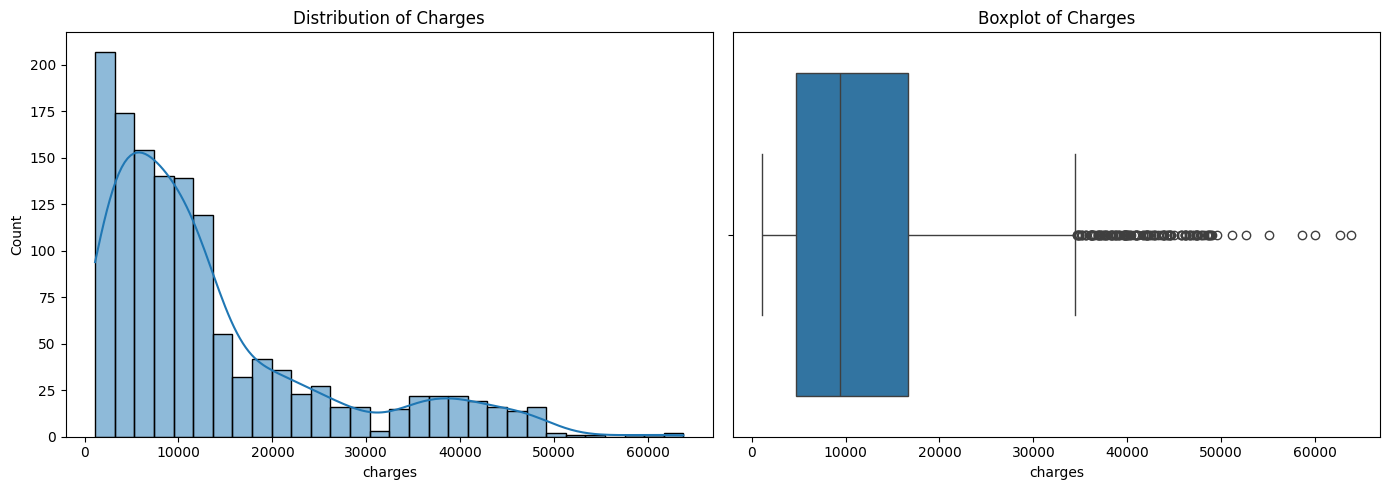

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64
Skewness: 1.5153909108403483


In [2199]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Histogram + KDE on left
sns.histplot(df['charges'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Distribution of Charges")

# Boxplot on right
sns.boxplot(x=df['charges'], ax=axes[1])
axes[1].set_title("Boxplot of Charges")

plt.tight_layout()
plt.show()

# Print stats and skewness separately
print(df['charges'].describe())
print("Skewness:", df['charges'].skew())

As we can see, the **skewness is 1.51**, indicating that the distribution of medical charges is **highly skewed to the right**. This is expected, as healthcare costs often follow this pattern—**a large portion of individuals incur relatively low charges**, while a **small subset requires significantly higher medical expenses**.

From the **histogram and KDE plot**, we observe:

* A clear **peak** in charges **under \$10,000**.
* A **gradual decline** in frequency as charges increase.
* A **slight bump** around the \$30,000–\$40,000 range, possibly due to a cluster of serious but not extreme cases.
* After that, the distribution **continues to taper off** until the maximum value.

Based on the **boxplot**:

* **75%** of the data lies **below \$17,000**.
* **Outliers begin around \$35,000**, with a **dense cluster between** \$35,000 and \$50,000.
* A few extreme outliers exceed **\$50,000**, representing severe or long-term medical cases.

To address this **strong skewness**, especially for modeling purposes, we will apply a **logarithmic transformation** to normalize the distribution and reduce the influence of extreme outliers.

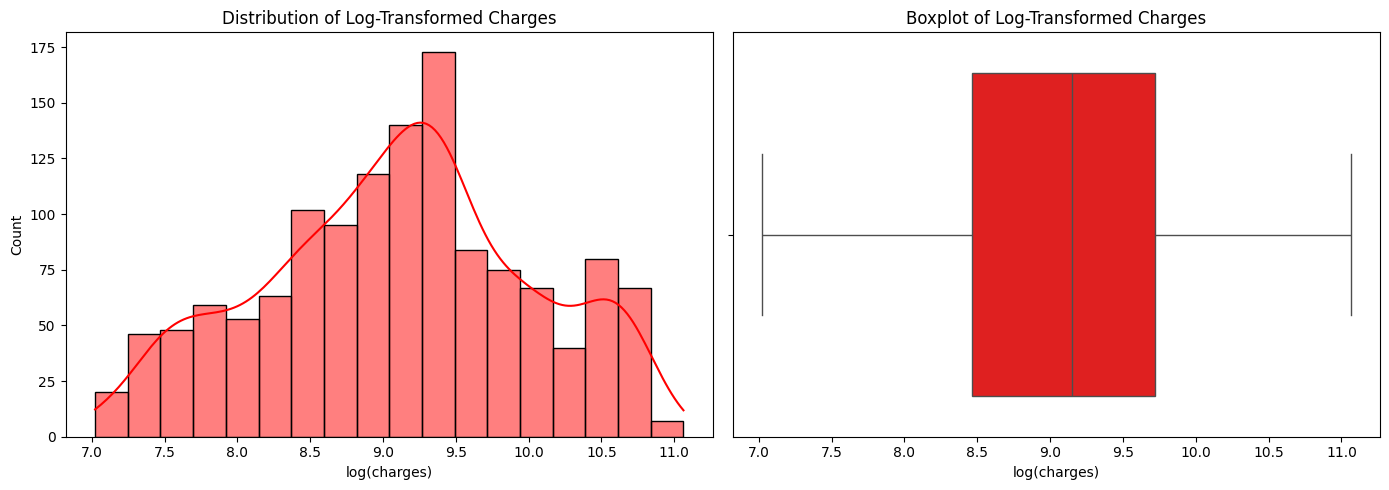

In [2200]:
# Apply log transformation temporarily (not modifying df)
log_charges = np.log(df['charges'])

# Set up the side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE of log-transformed charges on the left
sns.histplot(log_charges, kde=True, ax=axes[0], color='red')
axes[0].set_title("Distribution of Log-Transformed Charges")
axes[0].set_xlabel("log(charges)")

# Boxplot of log-transformed charges on the right
sns.boxplot(x=log_charges, ax=axes[1], color='red')
axes[1].set_title("Boxplot of Log-Transformed Charges")
axes[1].set_xlabel("log(charges)")

plt.tight_layout()
plt.show()

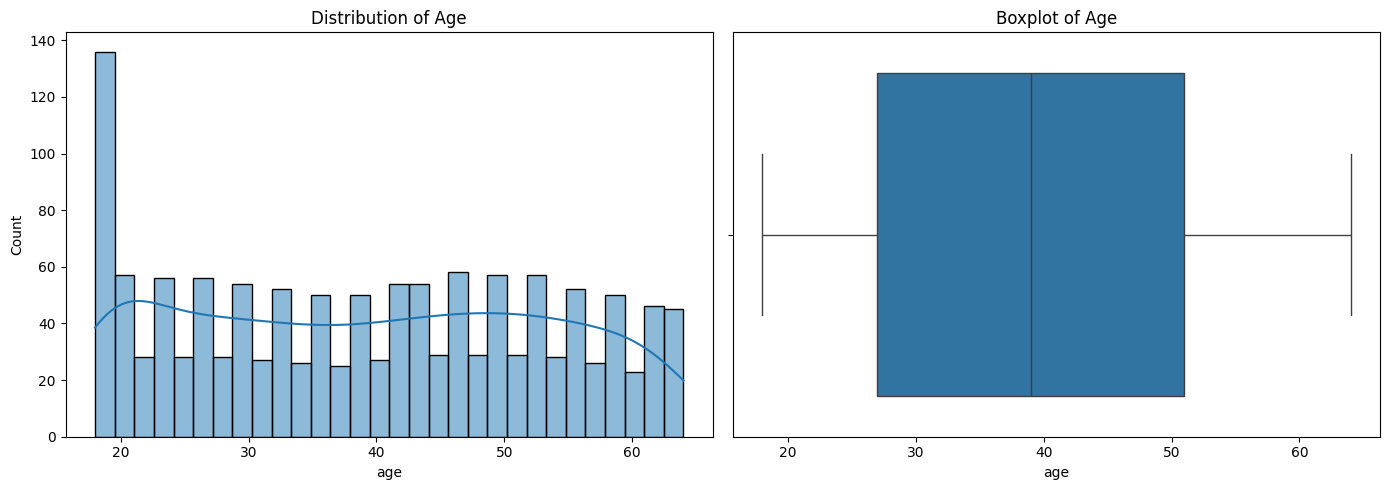

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
Skewness: 0.054780773126998195


In [2201]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Histogram + KDE on left
sns.histplot(df['age'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Distribution of Age")

# Boxplot on right
sns.boxplot(x=df['age'], ax=axes[1])
axes[1].set_title("Boxplot of Age")

plt.tight_layout()
plt.show()

# Print stats and skewness separately
print(df['age'].describe())
print("Skewness:", df['age'].skew())


* **Skewness**: The skewness of the `age` feature is approximately **0.056**, which is close to zero. This indicates that the age distribution is approximately **symmetric**, with no significant skew to the left or right.

* **KDE + Histogram**:

  * The distribution shows a **peak in the early 20s**, indicating a higher concentration of younger individuals.
  * There is a **gradual decline** in frequency as age increases.
  * A **small bump around 40–50** suggests a slight increase in the number of middle-aged individuals, followed by a continued decline toward the maximum age.
  * There are **no values below 18**, as expected for an insurance dataset.

* **Boxplot**:

  * The **boxplot confirms that there are no outliers** in the `age` feature.
  * The median age is located near the center of the interquartile range (IQR), and it is approximately equal to the mean—both of which are strong indicators that the age distribution is symmetric



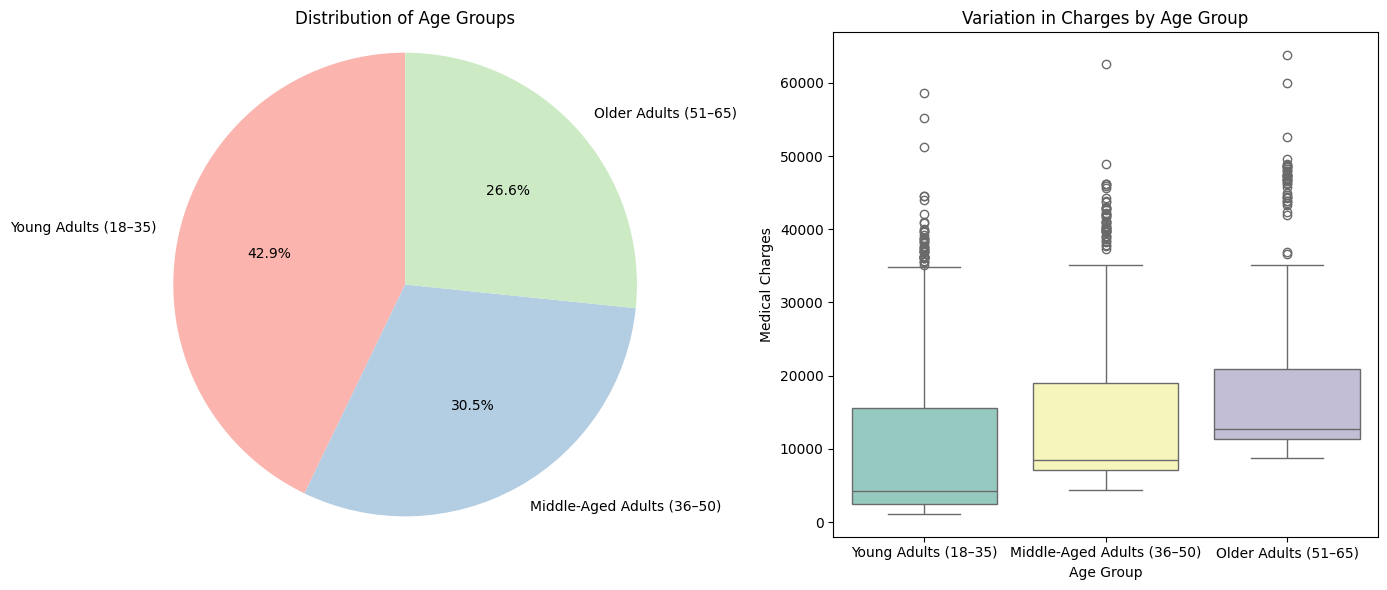

In [2202]:
# Define bins and descriptive labels
bins = [17, 35, 50, 65]
labels = ['Young Adults (18–35)', 'Middle-Aged Adults (36–50)', 'Older Adults (51–65)']

# Create a new categorical age group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)


# Get value counts of each age group
age_counts = df['age_group'].value_counts().sort_index()

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart (left)
axes[0].pie(age_counts.values,
            labels=age_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Pastel1.colors)
axes[0].set_title('Distribution of Age Groups')
axes[0].axis('equal')

# Boxplot (right)
sns.boxplot(x='age_group', y='charges', data=df, ax=axes[1], palette='Set3', hue='age_group', legend=False)
axes[1].set_title('Variation in Charges by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Medical Charges')

plt.tight_layout()
plt.show()


**Interpretation:**

As we see here, the dataset is dominated by Young Adults, followed by Middle-Aged Adults, and then Older Adults. The pie chart clearly reflects this distribution.

From the boxplot comparing charges across these age groups, we observe a steady increase in median medical charges with age. Older adults tend to have higher median charges, reflecting generally higher healthcare costs.

However, the younger age group shows a wider spread in charges compared to older adults, indicating more variability in medical expenses among younger individuals. This may be due to a mix of generally low costs for most young people alongside some high-cost cases.

To statistically verify whether the differences in charges across age groups are significant, we will perform an ANOVA test next.



In [2203]:
df_anova = df.dropna(subset=['age_group', 'charges'])
grouped = df_anova.groupby('age_group', observed=False)['charges'].apply(list)

f_stat, p_val = f_oneway(*grouped)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")

alpha = 0.05
if p_val < alpha:
    print("Result: There is a statistically significant difference in mean medical charges across age groups.")
else:
    print("Result: No statistically significant difference in mean medical charges across age groups")


F-statistic: 57.5134
P-value: 1.0989e-24
Result: There is a statistically significant difference in mean medical charges across age groups.


### Why Do Medical Charges Increase with Age?

1. **Increased Health Risks**
   As people grow older, they face a higher risk of chronic conditions such as **hypertension, diabetes, heart disease, and arthritis**. Managing these conditions often requires regular doctor visits, ongoing medication, diagnostic tests, and occasional hospitalization—all of which contribute to rising costs.

2. **Greater Use of Medical Services**
   Aging individuals typically undergo **more frequent health screenings, specialist consultations, and preventive procedures**. This increased utilization of healthcare services adds to their total medical charges.

3. **Higher Insurance Premiums**
   In insurance-based healthcare systems, **older individuals often pay higher premiums** and may face higher deductibles or co-payments. These higher costs can be reflected in the dataset as increased reported “charges.”

4. **Increased Risk of Major Medical Events**
   With age, the probability of experiencing **serious medical events**—such as surgeries, cancer treatments, or emergency interventions—rises. These events are often **high-cost outliers** in medical expenditure data.

5. **Life Expectancy and End-of-Life Costs**
   In later life stages, individuals may require **long-term care**, including nursing homes or home care services. Additionally, **end-of-life treatments** tend to be intensive and costly, contributing to a skew in average charges for older demographics.

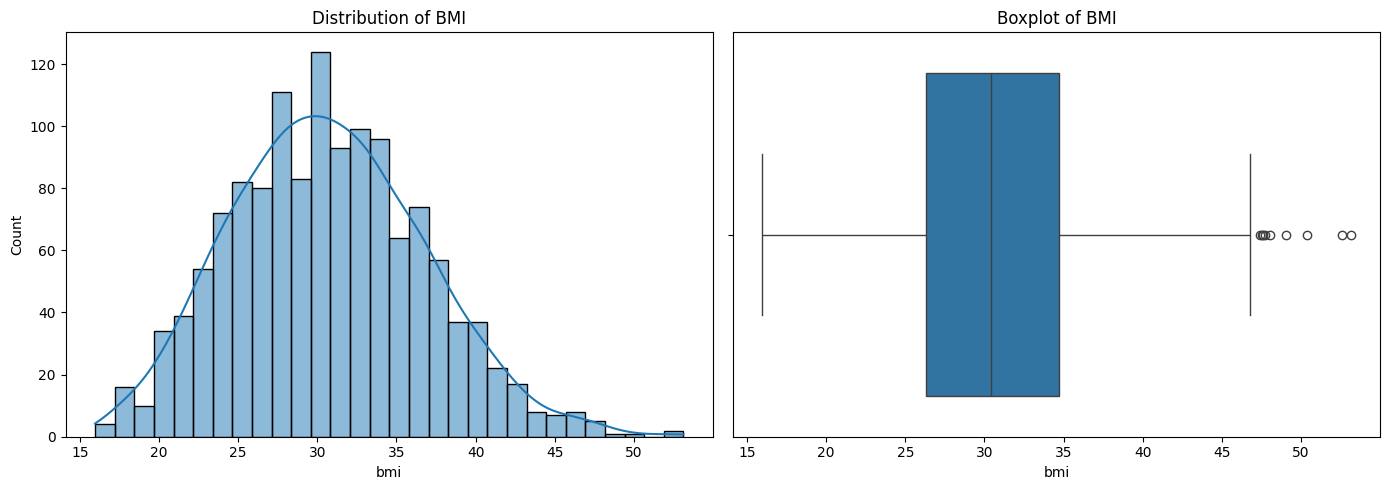

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
Skewness: 0.28391419385321137


In [2204]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Histogram + KDE on left
sns.histplot(df['bmi'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Distribution of BMI")

# Boxplot on right
sns.boxplot(x=df['bmi'], ax=axes[1])
axes[1].set_title("Boxplot of BMI")

plt.tight_layout()
plt.show()

# Print stats and skewness separately
print(df['bmi'].describe())
print("Skewness:", df['bmi'].skew())


The distribution of **BMI** shows a **moderate right skew** with a skewness of approximately **0.283**, indicating a slight asymmetry where higher values are pulling the distribution to the right. This is confirmed by the **boxplot**, which reveals several **outliers on the upper end**—these correspond to individuals with **severe obesity (Obese Class III)**.

The **histogram** and **KDE** plot indicate that:

* The **majority of BMI values (around 68%)** lie between **25 and 35**, with a **peak near 30**, suggesting a large portion of the population falls into the **Overweight (25.0–29.9)** and **Obese Class I (30.0–34.9)** categories.
* Around **95% of the data** falls within the **18 to 42** range, spanning from **Normal weight (18.5–24.9)** to **Obese Class II (35.0–39.9)**.
* **Underweight cases (BMI < 18.5)** are **very rare**, while **extreme obesity (BMI ≥ 40, Obese Class III)**, though also rare, contributes to the observed right skew and upper-end outliers.

**Obesity Classifications (WHO Standard):**

* **Underweight**: BMI < 18.5
* **Normal weight**: 18.5 ≤ BMI < 25
* **Overweight**: 25 ≤ BMI < 30
* **Obese Class I**: 30 ≤ BMI < 35
* **Obese Class II**: 35 ≤ BMI < 40
* **Obese Class III (Severe/Morbid obesity)**: BMI ≥ 40

Overall, the BMI distribution is **approximately normal** with a **slight skew due to extreme obesity cases**, which is expected in a general population sample.



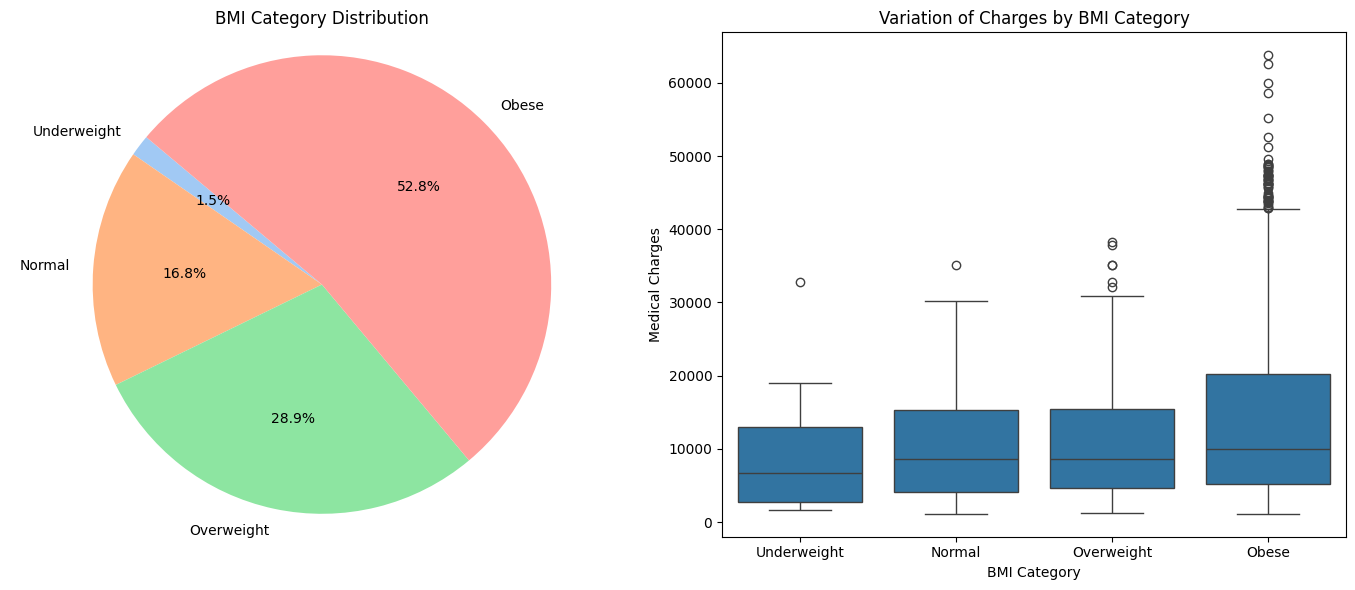

In [2205]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'


df['bmi_category'] = df['bmi'].apply(classify_bmi)

# New BMI category order
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_counts = df['bmi_category'].value_counts().reindex(bmi_order).dropna()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart
axes[0].pie(
    bmi_counts, 
    labels=bmi_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel")
)
axes[0].set_title('BMI Category Distribution')
axes[0].axis('equal')

# Boxplot of Charges by BMI Category
sns.boxplot(
    x='bmi_category', 
    y='charges', 
    data=df, 
    order=bmi_order,
    ax=axes[1]
)
axes[1].set_title('Variation of Charges by BMI Category')
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Medical Charges')

plt.tight_layout()
plt.show()

The distribution of BMI categories in the dataset reveals a clear trend:

**Obese > Overweight > Normal > Underweight**

This indicates that the majority of individuals fall into the overweight and obese categories, while underweight cases are rare, representing only about 2% of the population. Such a pattern suggests a context where overnutrition is more prevalent than undernutrition, likely pointing to a developed or affluent society where access to food is high and lifestyle-related health issues are more common. The few underweight individuals may be linked to specific medical or psychological conditions (such as anorexia nervosa) rather than socioeconomic deprivation.

A visual inspection of the boxplot showing medical charges across BMI categories reveals the following:

* A steady increase in median medical charges as BMI increases.
* A corresponding increase in variability, particularly in the Obese group.
* The Obese category exhibits the widest spread of charges and contains the most outliers, likely reflecting the higher cost of treating severe obesity-related conditions such as diabetes, cardiovascular disease, and other comorbidities.

This observed trend suggests a potentially significant relationship between BMI and medical expenses. To validate this observation, a one-way ANOVA test will be performed to determine whether the mean charges differ significantly across BMI categories.



In [2206]:
# Ensure there are no missing values in relevant columns
df_anova = df.dropna(subset=['bmi_category', 'charges'])

# Group charges by BMI category
groups = df_anova.groupby('bmi_category')['charges'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

# Display results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Result: There is a statistically significant difference in mean medical charges across BMI categories.")
else:
    print("Result: No statistically significant difference in mean medical charges across BMI categories.")


F-statistic: 18.8741
P-value: 5.4413e-12
Result: There is a statistically significant difference in mean medical charges across BMI categories.


### Why Medical Charges Increase with BMI?
The positive relationship between BMI and medical charges can be attributed to the increased health risks associated with higher body mass. Individuals classified as overweight or obese are more prone to developing chronic conditions such as type 2 diabetes, high blood pressure, heart disease, joint problems, and certain types of cancer. These health issues often require frequent doctor visits, diagnostic tests, medications, and long-term management — all of which contribute to rising healthcare costs.

Moreover, obesity can complicate medical procedures and extend recovery times, increasing hospitalization and treatment expenses. As BMI increases, especially beyond the obesity threshold (BMI ≥ 30), insurance providers tend to assign higher charges due to the greater expected utilization of medical services.

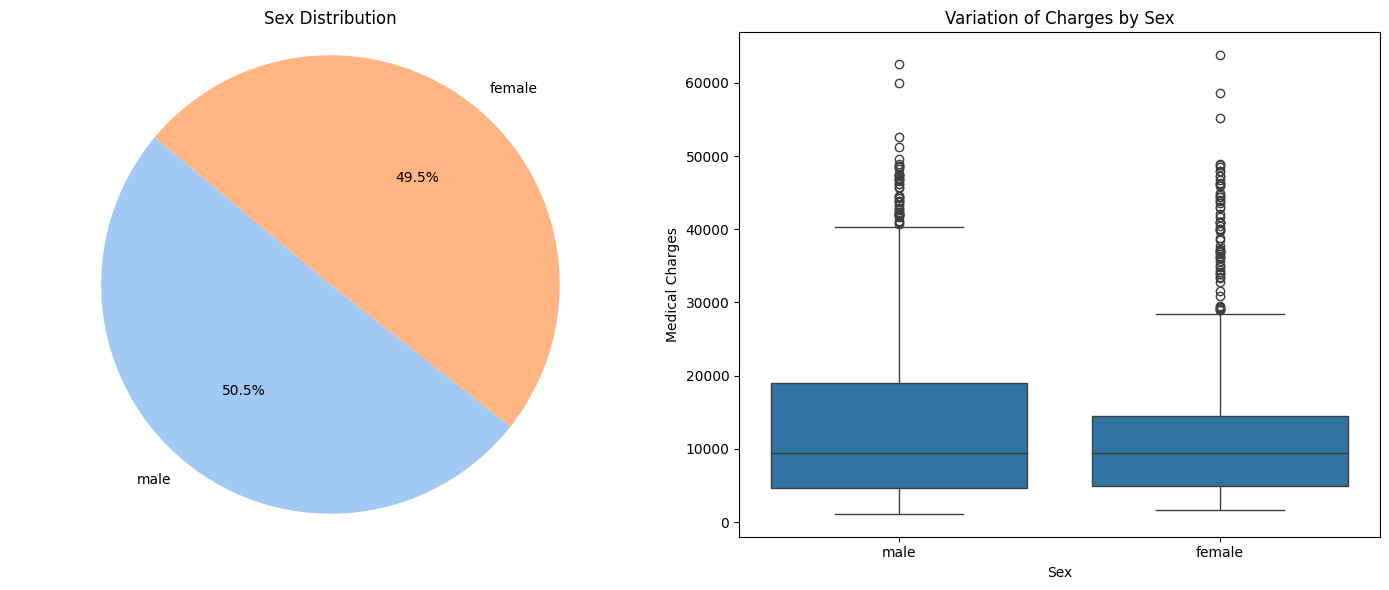

In [2207]:
# Get the order of sex categories present in the data
sex_order = df['sex'].value_counts().index.tolist()

# Prepare pie chart data
sex_counts = df['sex'].value_counts().reindex(sex_order)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart: Sex Distribution
axes[0].pie(
    sex_counts, 
    labels=sex_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel")
)
axes[0].set_title('Sex Distribution')
axes[0].axis('equal')

# Boxplot: Charges by Sex
sns.boxplot(
    x='sex', 
    y='charges', 
    data=df, 
    order=sex_order,
    ax=axes[1]
)
axes[1].set_title('Variation of Charges by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Medical Charges')

plt.tight_layout()
plt.show()


The dataset demonstrates a nearly balanced gender distribution, with males comprising approximately **50.5%** and females **49.5%**. This balance allows for fair comparisons between male and female subgroups, minimizing the risk of bias in gender-based analysis.

The boxplot comparison reveals that both males and females have **similar median medical charges**, suggesting comparable central tendencies. However, males exhibit a **wider spread in charges**, indicating greater variability. This may be attributed to factors such as **higher average BMI**, **risk-taking behavior**, or **occupational hazards**, which can increase the likelihood or severity of medical conditions.

In contrast, females display **more extreme outliers**, which may be associated with **pregnancy-related expenses**, **complex treatments**, or **late-stage diagnoses**. Although rare, these cases can lead to **exceptionally high medical costs**.

To determine whether the observed differences in medical charges are statistically significant between sexes, a **one-way ANOVA test** will be conducted comparing the mean charges of males and females.


In [2208]:
# Remove missing values from relevant columns
df_anova = df.dropna(subset=['sex', 'charges'])

# Group charges by sex
grouped = df_anova.groupby('sex')['charges'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*grouped)

# Display results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Result: There is a statistically significant difference in mean medical charges between males and females.")
else:
    print("Result: No statistically significant difference in mean medical charges between males and females.")

F-statistic: 4.5130
P-value: 3.3821e-02
Result: There is a statistically significant difference in mean medical charges between males and females.


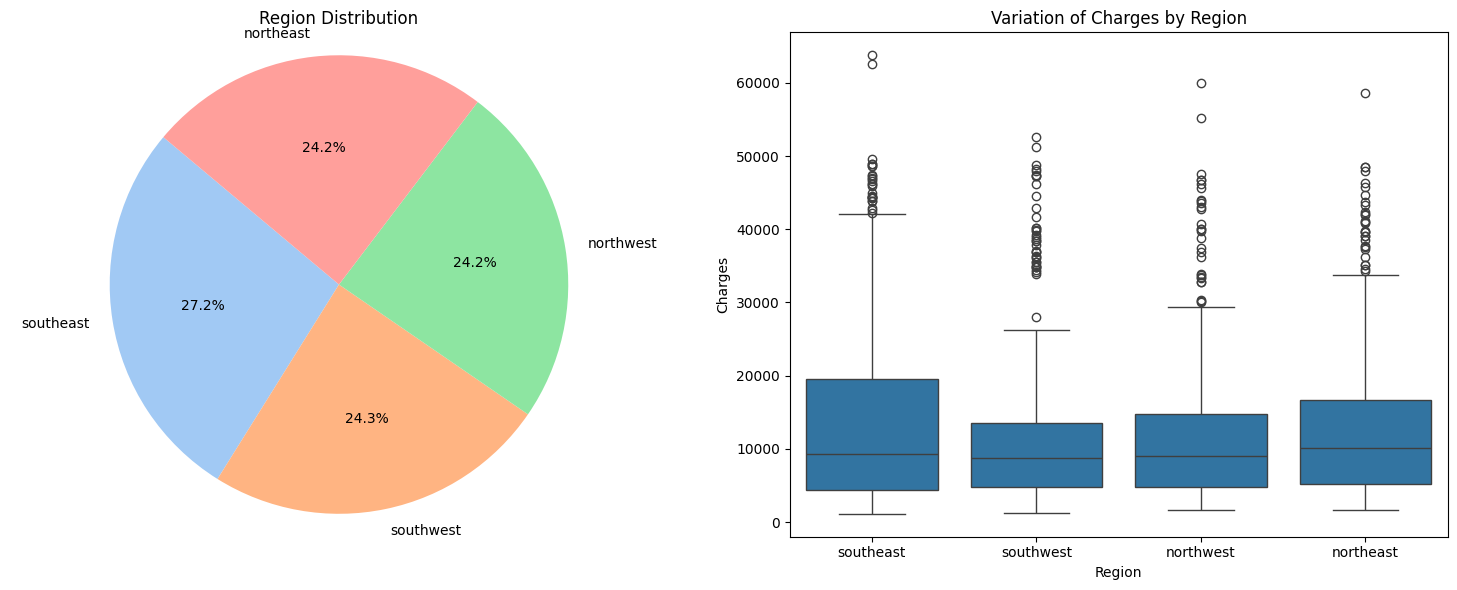

In [2209]:
# Get the order of regions present in the dataset
region_order = df['region'].value_counts().index.tolist()

# Count of each region for the pie chart
region_counts = df['region'].value_counts().reindex(region_order)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie Chart: Region Distribution
axes[0].pie(
    region_counts,
    labels=region_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
axes[0].set_title('Region Distribution')
axes[0].axis('equal')

# Boxplot: Charges by Region
sns.boxplot(
    x='region',
    y='charges',
    data=df,
    order=region_order,
    ax=axes[1]
)
axes[1].set_title('Variation of Charges by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Charges')

plt.tight_layout()
plt.show()


The dataset shows that the **Southeast** region accounts for the largest share of the population at approximately **27%**, while the other three regions—**Northeast**, **Northwest**, and **Southwest**—each contribute roughly **24%**. This moderate variation may reflect underlying demographic or socioeconomic differences that influence medical costs and health behaviors, suggesting a need for further geographic-focused study.

In terms of medical charges:

* The **Southeast** region exhibits the **highest average charges**, followed by the **Northeast**.
* The **Northwest** and **Southwest** regions show **similar and comparatively lower average charges**.

These differences may indicate regional disparities in healthcare costs, population health status, or access to medical services. Additionally, the **Southeast** displays the widest spread of charges, reflecting greater variability possibly linked to differences in care quality or severity of cases.

Conversely, the **Southwest** region has a tighter distribution of charges but a higher number of outliers, which may represent rare but costly medical cases. These outliers could suggest gaps in preventive care or delays in diagnosis specific to this region.

To statistically assess whether these observed differences in mean medical charges across regions are significant, a **one-way ANOVA test** will be conducted.


In [2210]:
# Drop missing values in 'region' and 'charges'
df_anova = df.dropna(subset=['region', 'charges'])

# Group charges by region
groups = df_anova.groupby('region')['charges'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")

alpha = 0.05
if p_val < alpha:
    print("Result: There is a statistically significant difference in mean medical charges across regions.")
else:
    print("Result: No statistically significant difference in mean medical charges across regions.")


F-statistic: 2.9261
P-value: 3.2763e-02
Result: There is a statistically significant difference in mean medical charges across regions.


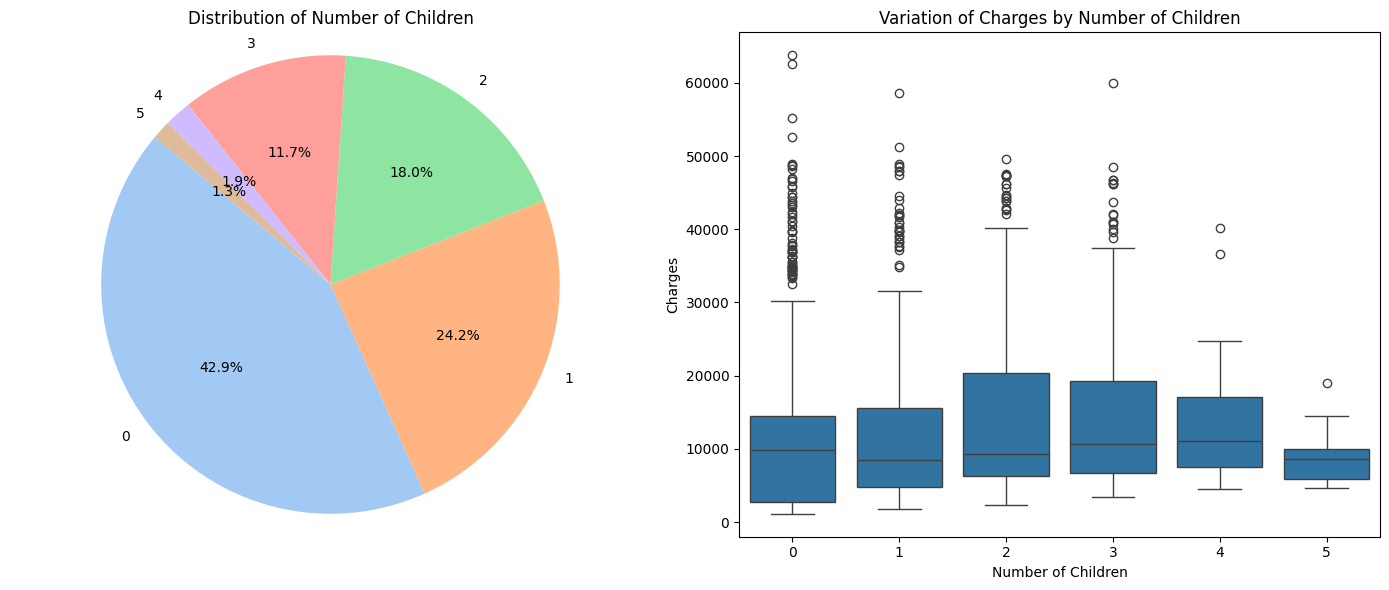

In [2211]:
# Get unique children counts in sorted order
children_order = sorted(df['children'].dropna().unique())

# Count number of observations per children count
children_counts = df['children'].value_counts().reindex(children_order)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart: children distribution
axes[0].pie(
    children_counts, 
    labels=children_counts.index.astype(str),  # convert to str for labels
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel")
)
axes[0].set_title('Distribution of Number of Children')
axes[0].axis('equal')

# Boxplot: charges by number of children
sns.boxplot(
    x='children', 
    y='charges', 
    data=df, 
    order=children_order,
    ax=axes[1]
)
axes[1].set_title('Variation of Charges by Number of Children')
axes[1].set_xlabel('Number of Children')
axes[1].set_ylabel('Charges')

plt.tight_layout()
plt.show()


The distribution of the number of children per individual is right-skewed. Approximately **43%** of individuals have no children, followed by **24%** with one child, and progressively fewer with more children: **18%** have two children, **12%** have three, **1.9%** have four, and **1.4%** have five. This pattern may influence medical costs or insurance charges, as larger families often have distinct healthcare needs and financial considerations.

Visual examination of the boxplots reveals a general upward trend in median medical charges as the number of children increases. This suggests that medical expenses tend to rise with family size. An exception occurs for individuals with five children, where the median charge slightly decreases; this is likely due to the small sample size in this category.

Additionally, there is a noticeable decrease in the number of outliers as the number of children increases. This could reflect behavioral or lifestyle differences—individuals with more children might adopt more cautious behaviors and responsibilities, reducing exposure to high-risk activities that could result in extreme medical costs.

Furthermore, since individuals with more children are generally older, age-related health concerns may contribute to the gradual increase in charges, despite the lower frequency of extreme cases in larger families.

To formally evaluate whether the differences in mean medical charges across groups with different numbers of children are statistically significant, I will now conduct a one-way ANOVA test.

In [2212]:
# Drop rows with missing values in 'children' or 'charges'
df_anova = df.dropna(subset=['children', 'charges'])

# Group charges by number of children
groups = df_anova.groupby('children')['charges'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")

alpha = 0.05
if p_val < alpha:
    print("Result: There is a statistically significant difference in mean medical charges across groups with different numbers of children.")
else:
    print("Result: No statistically significant difference in mean medical charges across groups with different numbers of children.")

F-statistic: 3.2687
P-value: 6.1334e-03
Result: There is a statistically significant difference in mean medical charges across groups with different numbers of children.


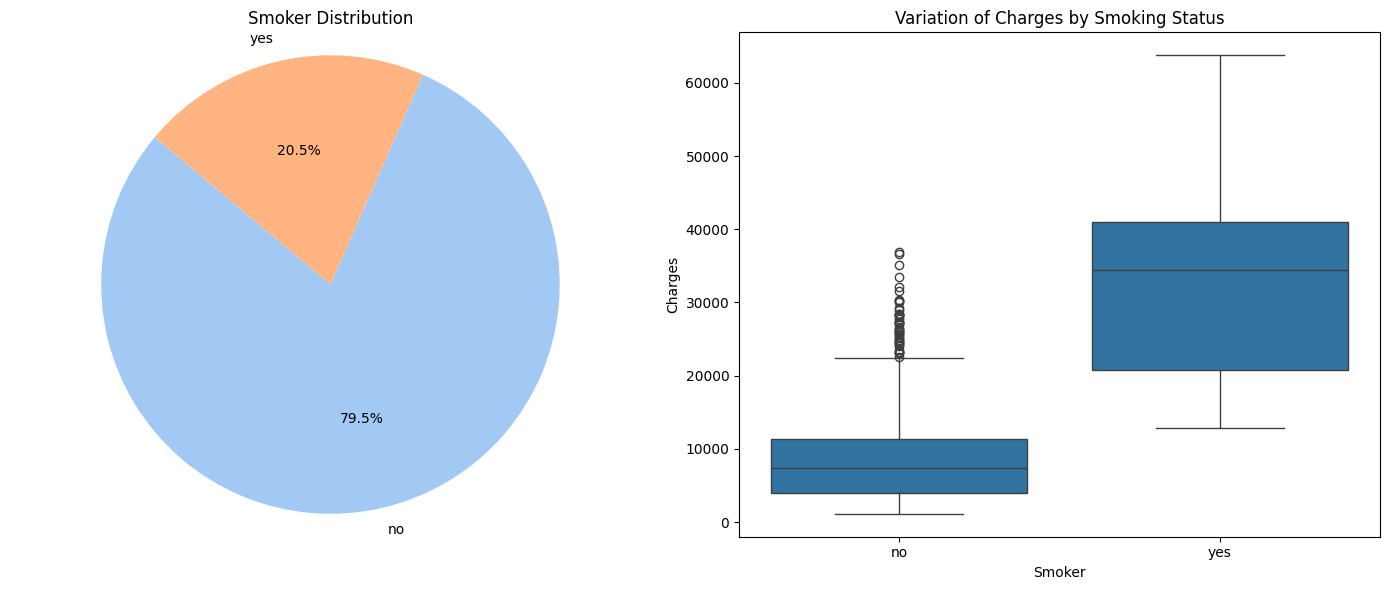

In [2213]:
# Get unique smoker categories in data (usually 'yes'/'no')
smoker_order = df['smoker'].value_counts().index.tolist()

# Count number of observations per smoker category
smoker_counts = df['smoker'].value_counts().reindex(smoker_order)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart: smoker distribution
axes[0].pie(
    smoker_counts,
    labels=smoker_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
axes[0].set_title('Smoker Distribution')
axes[0].axis('equal')

# Boxplot: charges by smoker status
sns.boxplot(
    x='smoker',
    y='charges',
    data=df,
    order=smoker_order,
    ax=axes[1]
)
axes[1].set_title('Variation of Charges by Smoking Status')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Charges')

plt.tight_layout()
plt.show()


Non-smokers constitute a significant majority of the population at approximately **79.5%**, while smokers make up **20.5%**. This imbalance suggests that any smoking-related effects on medical charges may be concentrated within a relatively small subgroup, underscoring the need for careful stratification or the inclusion of interaction terms when modeling health costs.

The boxplot reveals a striking difference in medical charges between smokers and non-smokers:

* **Smokers** exhibit a **median charge near \$35,000**, with a broad and elevated distribution. Notably, there are **no extreme outliers**, implying that high costs are consistently elevated rather than driven by a few extreme cases.

* **Non-smokers**, on the other hand, have a **much lower median (below \$10,000)**, along with a tighter distribution and several outliers, though none exceed \$40,000.

This sharp contrast illustrates the substantial economic burden of smoking-related illnesses, including cardiovascular disease, cancer, and chronic respiratory conditions—conditions that typically require intensive and ongoing medical treatment.

### ANOVA Analysis of BMI by Smoking Status, Sex, and Age Group

Since smoking may contribute to increased BMI through metabolic or behavioral mechanisms—such as poor diet, reduced physical activity, or stress-related habits—we will perform a one-way ANOVA test to assess whether there is a statistically significant difference in BMI between smokers and non-smokers.

Additionally, we will conduct a separate ANOVA test to evaluate whether BMI differs significantly between males and females, as gender-related biological and lifestyle factors may also influence body composition.

Finally, we will perform an ANOVA test across different age groups to determine whether BMI varies significantly with age, considering that aging can affect metabolism, physical activity levels, and overall body composition.


In [2214]:
# 1. BMI by smoker status
bmi_smoker = df[df['smoker'] == 'yes']['bmi']
bmi_nonsmoker = df[df['smoker'] == 'no']['bmi']

f_smoker, p_smoker = f_oneway(bmi_smoker, bmi_nonsmoker)
print(f"BMI by Smoker Status ANOVA:")
print(f"F-statistic: {f_smoker:.4f}, P-value: {p_smoker:.4e}")
if p_smoker < 0.05:
    print("✅ Significant difference in BMI between smokers and non-smokers.\n")
else:
    print("❌ No significant difference in BMI between smokers and non-smokers.\n")

# 2. BMI by sex
bmi_male = df[df['sex'] == 'male']['bmi']
bmi_female = df[df['sex'] == 'female']['bmi']

f_sex, p_sex = f_oneway(bmi_male, bmi_female)
print(f"BMI by Sex ANOVA:")
print(f"F-statistic: {f_sex:.4f}, P-value: {p_sex:.4e}")
if p_sex < 0.05:
    print("✅ Significant difference in BMI between males and females.\n")
else:
    print("❌ No significant difference in BMI between males and females.\n")

# 3. BMI by age group
groups_age = [df[df['age_group'] == category]['bmi'] for category in df['age_group'].unique()]

f_age, p_age = f_oneway(*groups_age)
print(f"BMI by Age Group ANOVA:")
print(f"F-statistic: {f_age:.4f}, P-value: {p_age:.4e}")
if p_age < 0.05:
    print("✅ Significant difference in BMI across age groups.\n")
else:
    print("❌ No significant difference in BMI across age groups.\n")


BMI by Smoker Status ANOVA:
F-statistic: 0.0187, P-value: 8.9115e-01
❌ No significant difference in BMI between smokers and non-smokers.

BMI by Sex ANOVA:
F-statistic: 2.8800, P-value: 8.9917e-02
❌ No significant difference in BMI between males and females.

BMI by Age Group ANOVA:
F-statistic: 7.7026, P-value: 4.7203e-04
✅ Significant difference in BMI across age groups.



/var/folders/jl/2x5ymcqj7wn6y9gj0jndb0mw0000gn/T/ipykernel_16077/155041809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='bmi', palette='Set3')


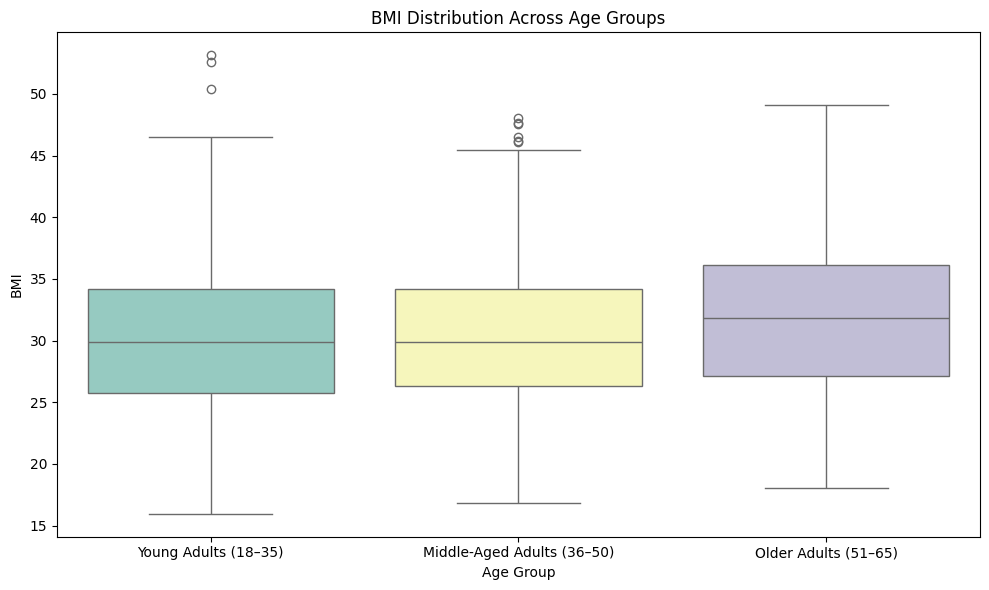

In [2215]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='bmi', palette='Set3')

plt.title('BMI Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()



The **boxplot** reveals a clear **upward trend in BMI** as age increases. Younger individuals generally have lower BMI values, while older age groups show **higher medians and broader variability**, indicating a gradual increase in body mass with age.

This visual pattern is **statistically supported by the earlier ANOVA test**, which confirmed a **significant difference in BMI across age groups**

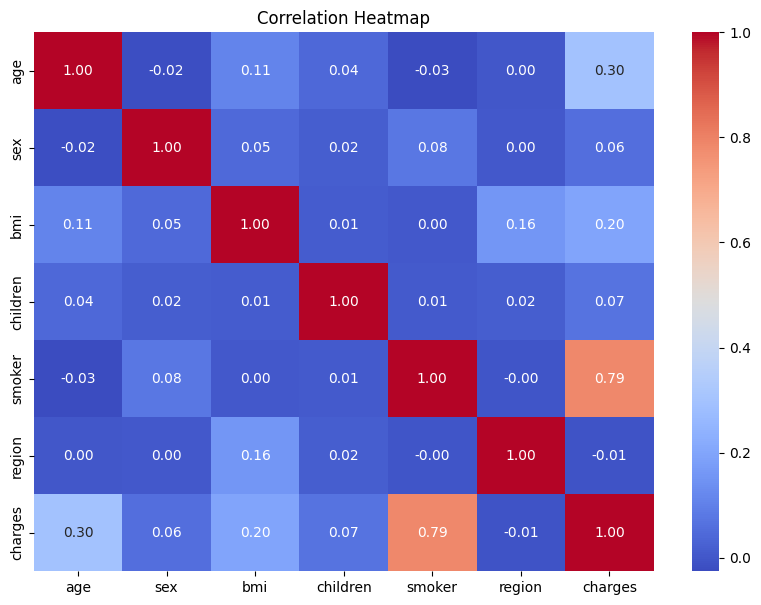

In [2216]:
# Copy only the relevant columns
df_corr = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].copy()

# Encode binary categorical features
df_corr['sex'] = df_corr['sex'].map({'male': 1, 'female': 0})
df_corr['smoker'] = df_corr['smoker'].map({'yes': 1, 'no': 0})

# Label encode region (e.g., northeast=0, northwest=1, southeast=2, southwest=3)
df_corr['region'] = df_corr['region'].astype('category').cat.codes

# # Log-transform charges
# df_corr['log_charges'] = np.log(df_corr['charges'])

# # Drop original skewed charges if not needed
# df_corr.drop(columns='charges', inplace=True)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


 These results underscore the **dominant role of lifestyle and health-risk behaviors**, particularly smoking, in driving up medical expenses — even more so than age or body weight.
 
* **Smoker** has the **strongest correlation** with medical charges (**r ≈ 0.76**), indicating that smoking status is a **major predictor** of increased healthcare costs. This reflects the substantial burden of smoking-related illnesses, which often require prolonged and expensive treatments.

* **Age** shows a moderate positive correlation (**r ≈ 0.30**), consistent with the fact that older individuals tend to have more complex and frequent medical needs.

* **BMI** also shows a mild positive correlation (**r ≈ 0.20**), supporting the known relationship between higher BMI and chronic health conditions such as diabetes, hypertension, and cardiovascular disease.

/var/folders/jl/2x5ymcqj7wn6y9gj0jndb0mw0000gn/T/ipykernel_16077/2890451392.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_rf.values, y=importance_rf.index, palette='viridis')


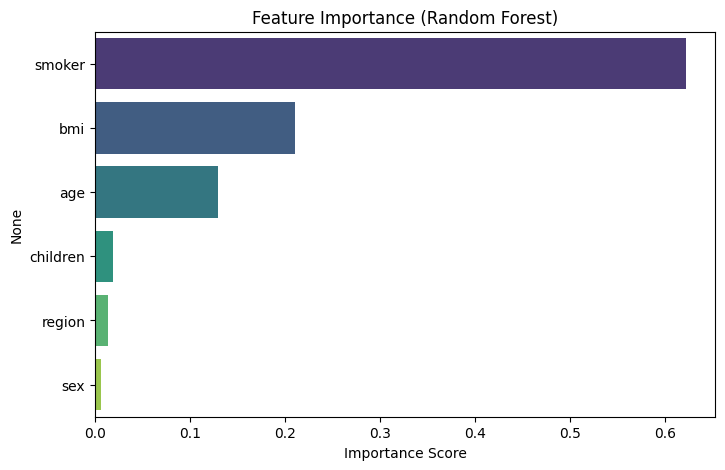

In [2217]:
from sklearn.ensemble import RandomForestRegressor

X = df_corr.drop(columns='charges')
y = df_corr['charges']

# Fit random forest on raw (unscaled) data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importance_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importance_rf.values, y=importance_rf.index, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

Using Random Forest feature importance—which captures non-linear relationships and interactions—we observe the following:

* **Smoker status** dominates as the most influential feature, with an importance score exceeding **0.6**. This highlights smoking as the strongest predictor of medical charges in the dataset.

* **BMI** ranks second, with an importance score between **0.2 and 0.3**, indicating a moderate but meaningful impact on charges, likely reflecting health risks associated with body weight.

* **Age** follows with an importance score between **0.1 and 0.2**, showing a smaller yet notable contribution to predicting charges.

These results underscore the significant role of lifestyle-related factors—particularly smoking and BMI—in driving medical expenses, beyond what simpler linear models might reveal.

From the correlation heatmap, which captures **linear relationships**, and the Random Forest feature importance, which uncovers **non-linear effects and interactions**, we observe that **smoker status** is the most influential feature for medical charges. **Age** and **BMI** also show important associations and will be examined further to better understand their relationships with charges.

/var/folders/jl/2x5ymcqj7wn6y9gj0jndb0mw0000gn/T/ipykernel_16077/4285519040.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_counts = df.groupby(['age_group', 'smoker']).size().unstack()


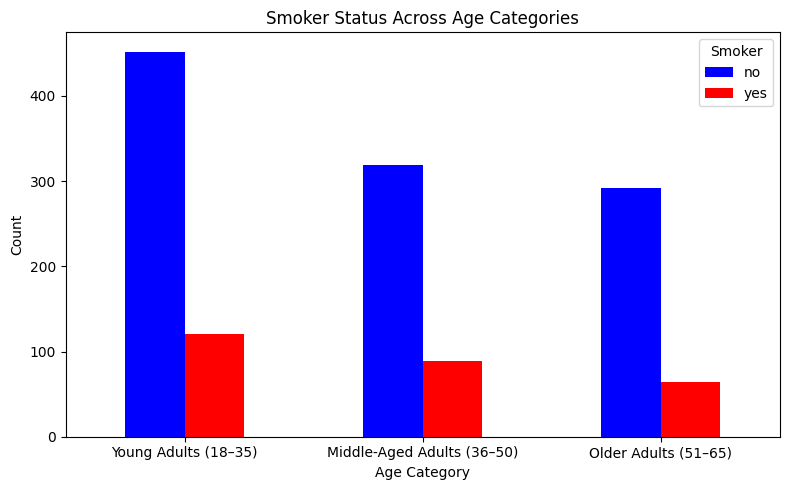

In [2218]:
# Count of smokers and non-smokers per age category
smoker_counts = df.groupby(['age_group', 'smoker']).size().unstack()

# Plot
smoker_counts.plot(kind='bar', stacked=False, figsize=(8, 5), color=['blue', 'red'])
plt.title('Smoker Status Across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


While the distribution suggests that younger individuals appear more likely to smoke, with the highest proportion of smokers in the youngest age group and a gradual decline across older groups, it is essential to confirm whether this observed pattern reflects a real dependency or is simply due to random variation.

To test this, we conducted a Chi-square test of independence between age group and smoking status. The result indicated that:

In [2219]:
# Create contingency table
contingency_table = pd.crosstab(df['age_group'], df['smoker'])

# Display the table
print("Contingency Table:\n", contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("\n✅ Result: There is a statistically significant relationship between age group and smoking status.")
else:
    print("\n❌ Result: There is no statistically significant relationship between age group and smoking status.")

Contingency Table:
 smoker                       no  yes
age_group                           
Young Adults (18–35)        452  121
Middle-Aged Adults (36–50)  319   89
Older Adults (51–65)        292   64

Chi-square statistic: 1.9562
P-value: 3.7603e-01
Degrees of freedom: 2

Expected frequencies:
 [[455.57142857 117.42857143]
 [324.38593867  83.61406133]
 [283.04263276  72.95736724]]

❌ Result: There is no statistically significant relationship between age group and smoking status.


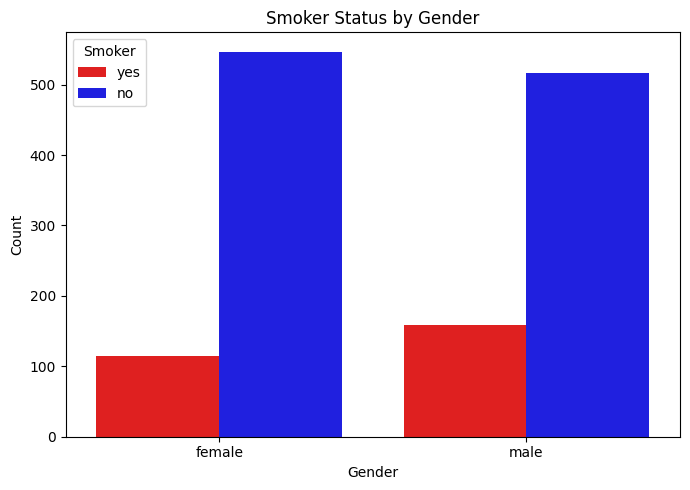

In [2220]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='sex', hue='smoker', palette={'yes': 'red', 'no': 'blue'})

plt.title('Smoker Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()


initial analysis reveals that males are more likely to smoke than females. The proportion of smokers is notably higher among men, suggesting a possible relationship between sex and smoking behavior.

To statistically evaluate this observation, we will perform a Chi-square test of independence between sex and smoking status:

In [2221]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Display the table
print("Contingency Table:\n", contingency_table)

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("\n✅ Result: There is a statistically significant relationship between sex and smoking status.")
else:
    print("\n❌ Result: There is no statistically significant relationship between sex and smoking status.")

Contingency Table:
 smoker   no  yes
sex             
female  547  115
male    516  159

Chi-square statistic: 7.4691
P-value: 6.2766e-03
Degrees of freedom: 1

Expected frequencies:
 [[526.33208676 135.66791324]
 [536.66791324 138.33208676]]

✅ Result: There is a statistically significant relationship between sex and smoking status.


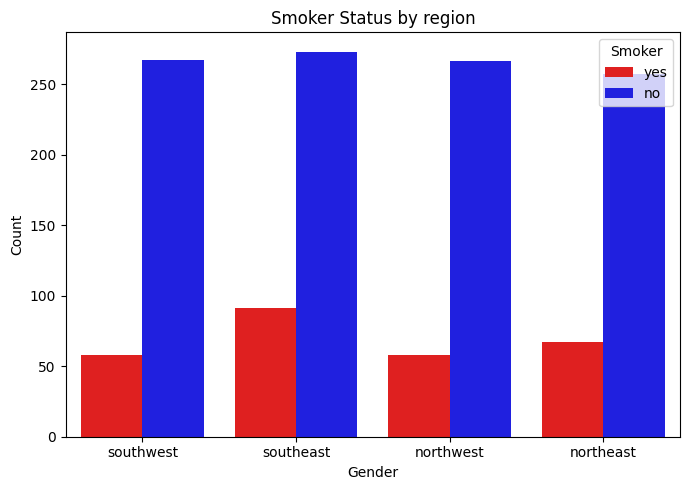

In [2222]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='region', hue='smoker', palette={'yes': 'red', 'no': 'blue'})

plt.title('Smoker Status by region')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

As observed, there is a slight variation in the number of smokers across different regions, with the Southeast region having the highest count. To determine whether this variation reflects a true association between smoking status and region, we will perform a Chi-square test of independence:

In [2223]:
# Create a contingency table
contingency_table = pd.crosstab(df['region'], df['smoker'])

# Display the table
print("Contingency Table:\n", contingency_table)

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("\n✅ Result: There is a statistically significant relationship between region and smoking status.")
else:
    print("\n❌ Result: There is no statistically significant relationship between region and smoking status.")

Contingency Table:
 smoker      no  yes
region             
northeast  257   67
northwest  266   58
southeast  273   91
southwest  267   58

Chi-square statistic: 7.2779
P-value: 6.3548e-02
Degrees of freedom: 3

Expected frequencies:
 [[257.60059835  66.39940165]
 [257.60059835  66.39940165]
 [289.40314136  74.59685864]
 [258.39566193  66.60433807]]

❌ Result: There is no statistically significant relationship between region and smoking status.


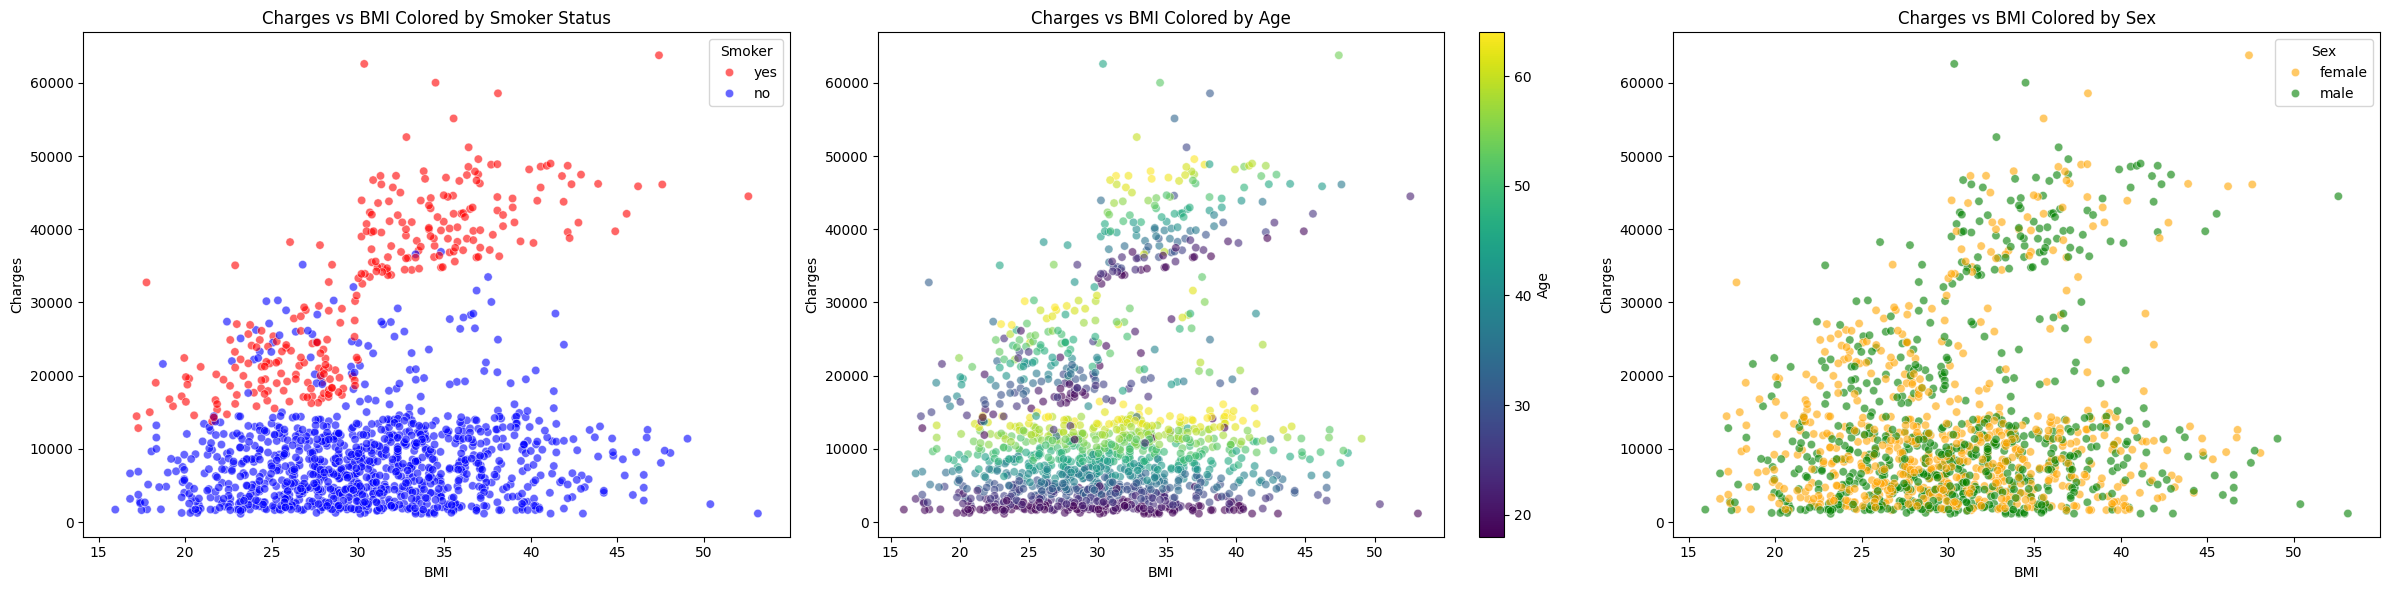

In [2224]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# LEFT: Charges vs BMI colored by smoker
sns.scatterplot(
    data=df,
    x='bmi',
    y='charges',
    hue='smoker',
    palette={'yes': 'red', 'no': 'blue'},
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Charges vs BMI Colored by Smoker Status')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges')
axes[0].legend(title='Smoker')

# MIDDLE: Charges vs BMI colored by age
sns.scatterplot(
    data=df,
    x='bmi',
    y='charges',
    hue='age',
    palette='viridis',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Charges vs BMI Colored by Age')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')
axes[1].legend_.remove()  # remove legend to reduce clutter

# Add colorbar for age
norm = plt.Normalize(df['age'].min(), df['age'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes[1], label='Age')

# RIGHT: Charges vs BMI colored by sex
sns.scatterplot(
    data=df,
    x='bmi',
    y='charges',
    hue='sex',
    palette={'male': 'green', 'female': 'orange'},
    alpha=0.6,
    ax=axes[2]
)
axes[2].set_title('Charges vs BMI Colored by Sex')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Charges')
axes[2].legend(title='Sex')

plt.tight_layout()
plt.show()



###  Visual Cluster Interpretation: Charges vs. BMI (Using Manual Clustering)

Through visual inspection of the **charges vs. BMI** scatter plots (colored by smoker status, sex, and age), we can manually identify **three distinct clusters**, each defined by combinations of **smoker status**, **BMI levels**, and **age**, which collectively stratify individuals into varying risk and cost categories.

---

#### **Cluster 1: Non-Smokers**

* **Starting Charges:** \~\$1,100 (lowest in the dataset)
* **BMI Distribution:**

  * Most individuals fall below **BMI 35**, with a **gradual decline in frequency** beyond that point.
  * This indicates that **severe obesity (BMI > 35)** is relatively uncommon among non-smokers.
* **Age Stratification:**

  * **Young non-smokers** (≤ 30 years old) make up the **lowest-cost** subgroup.
  * **Middle-aged (30–45)** non-smokers show moderately higher charges.
  * **Older non-smokers** (> 45) experience the **highest charges** in this cluster.
* **Sex Distribution:**

  * Largely balanced between **males and females**.
  * In the **extreme BMI range (BMI > 45)**, there's a **higher concentration of females**, possibly due to pregnancy-related care or complex chronic conditions.

---

#### **Cluster 2: Smokers – Non-Obese (BMI < 30)**

* **Starting Charges:** \~\$15,000
* **BMI:** Generally lower, but charges are substantially higher than non-smokers.
* **Age Stratification:**

  * A similar age trend is observed, with costs increasing across young → middle-aged → older smokers.
* **Sex Distribution:** Appears to be **evenly distributed** between men and women.
* **Interpretation:** Despite not being obese, **smoking alone significantly raises medical costs**, suggesting strong links to chronic illnesses or higher-risk care needs.

---

#### **Cluster 3: Smokers – Obese (BMI ≥ 30)**

* **Starting Charges:** \~\$35,000 (highest base cost)
* **BMI:** High across the board, concentrated in the obese category.
* **Age Stratification:**

  * Again, charges rise as we move from younger to older individuals.
* **Sex Distribution:** This cluster is **predominantly male**, suggesting a possible link between male smokers and obesity-related high-risk health profiles.
* **Interpretation:** This group represents the **highest-risk, highest-cost** population, where the combination of **smoking and obesity** appears to amplify healthcare expenses considerably.

---
Across all three clusters, we observe:

* A **progressive increase in charges** as we move from **non-smokers → smokers (non-obese) → smokers (obese)**.
* **Age** consistently stratifies risk within each group, with **older individuals incurring higher costs**.
* While **BMI alone doesn't account for all variation**, its interaction with **smoking status and age** is critical.
* **Gender effects** are nuanced: while generally balanced, specific subpopulations (e.g., extremely high BMI among non-smokers, and high-cost male smokers) reveal more targeted patterns.

### **Using K-Means Clustering to Define Risk Groups**

To enhance our analysis, we can apply **unsupervised learning**—specifically, **K-Means clustering**—to identify natural groupings in the dataset and introduce a new **risk factor feature**. This feature segments individuals into distinct clusters based on key health-related variables such as **charges, BMI, age, and smoking status**.

To determine the **optimal number of clusters**, we use the **Elbow Method**. This involves fitting the K-Means algorithm with a range of cluster counts and plotting the **inertia** (i.e., within-cluster sum of squares) for each. The "elbow point" on the graph—where the rate of decrease in inertia sharply changes—indicates the optimal number of clusters that best balances model simplicity and data representation.

Once clusters are defined, each individual is assigned to a risk group (e.g., *low*, *medium*, *high*), allowing us to incorporate a meaningful, data-driven segmentation into our analysis of healthcare costs.


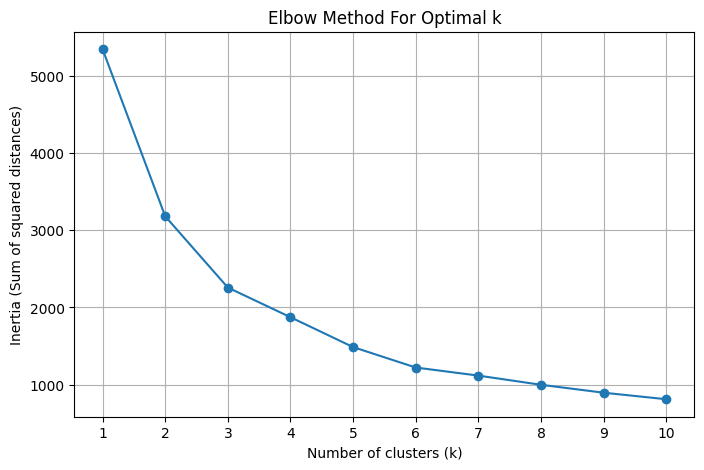

In [2225]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data
df_cluster = df[['charges', 'bmi', 'age', 'smoker']].copy()
df_cluster['smoker'] = df_cluster['smoker'].map({'yes': 1, 'no': 0})

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Use Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)  # test 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


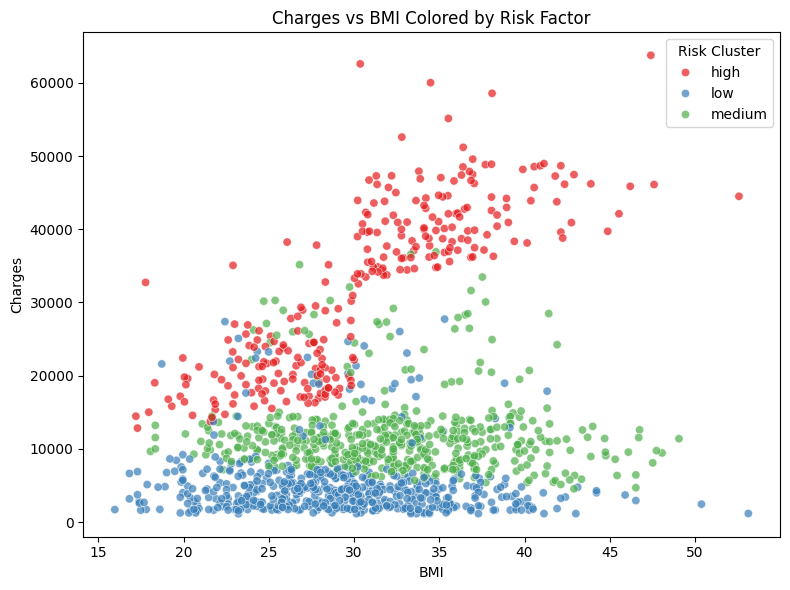

In [2226]:
optimal_k = 3 # replace with your chosen k from the elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['risk_cluster'] = kmeans.fit_predict(scaled_data)

# Ensure 'risk_cluster' is treated as a category for color mapping
df['risk_cluster'] = df['risk_cluster'].astype(str)

# Map risk_cluster strings to risk factors: 0=High, 1=Low, 2=Medium
mapping = {
    '0': 'high',  # High risk
    '1': 'low',  # Low risk
    '2': 'medium'   # Medium risk
}

df['risk_factor'] = df['risk_cluster'].map(mapping).astype('category')

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='bmi',
    y='charges',
    hue='risk_factor',
    palette='Set1',  # You can also try 'tab10' or 'Dark2'
    alpha=0.7
)
plt.title('Charges vs BMI Colored by Risk Factor')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Risk Cluster')
plt.tight_layout()
plt.show()


### **Real-World Implications**

1. **Health Policy & Insurance Pricing**

   * Smoking status emerged as the strongest predictor of medical charges, even more than age or BMI.
   * Insurance companies can leverage this insight to refine premium risk models by incorporating behavioral factors like smoking and obesity more heavily.
   * Age-stratified pricing remains relevant but should be complemented with lifestyle metrics.

2. **Public Health Interventions**

   * The sharp rise in medical costs among smokers—even those with a normal BMI—highlights the need for targeted anti-smoking campaigns.
   * Public health programs can use this data to justify investments in obesity prevention and smoking cessation programs.

3. **Resource Allocation in Healthcare**

   * Clusters of high-risk individuals (e.g., obese smokers) indicate where hospitals and clinics might expect the greatest demand for chronic disease management.
   * Policymakers can better allocate resources toward high-cost subgroups identified through data-driven clustering.

4. **Data-Driven Preventive Care**

   * The interaction between age, BMI, and smoker status enables predictive modeling to proactively identify individuals at risk of incurring high costs.
   * Insurers or health providers could introduce wellness programs or preventive screenings for these identified subpopulations.

5. **Regional Policy Adjustments**

   * Despite no statistically significant relationship between region and smoking status, the Southeast still exhibited the highest average charges.
   * Regional differences in health infrastructure or preventive care access may warrant deeper geographic studies to address local health disparities.

6. **Family Planning and Socioeconomic Considerations**

   * Rising medical charges with increasing number of children (until a certain point) suggest broader implications for family-based insurance packages or tax credits.
   * This also reflects how socioeconomic factors intersect with healthcare burdens and should inform inclusive policy design.
